In [6]:
# STAT 574 HW 1 Code problem 1 (Python Version)

# Import all necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from chefboost import Chefboost

In [4]:
# Problem 1: Hospital Data

# Importing and preprocessing dataset

path_directory = "C:/Users/coryg/OneDrive/Desktop/\
STAT_574_Data_Mining/hospital_data.csv"
hospital_data = pd.read_csv(path_directory)
gender_code = {'M':1, 'F':0}
hospital_data['gender'] = hospital_data['gender'].map(gender_code)

X = hospital_data.iloc[:,0:6].values
y = hospital_data.iloc[:,6].values

[Text(0.47794117647058826, 0.9166666666666666, 'surgery_cost <= 172.5\nsquared_error = 15967419.758\nsamples = 3046\nvalue = 12853.531'),
 Text(0.23529411764705882, 0.75, 'surgery_cost <= 141.5\nsquared_error = 7146523.702\nsamples = 2880\nvalue = 12295.447'),
 Text(0.35661764705882354, 0.8333333333333333, 'True  '),
 Text(0.17647058823529413, 0.5833333333333334, 'BMI <= 79.5\nsquared_error = 4229078.721\nsamples = 2486\nvalue = 11885.358'),
 Text(0.11764705882352941, 0.4166666666666667, 'surgery_cost <= 118.5\nsquared_error = 3317626.153\nsamples = 2214\nvalue = 11680.234'),
 Text(0.058823529411764705, 0.25, 'squared_error = 2355871.82\nsamples = 1551\nvalue = 11402.562'),
 Text(0.17647058823529413, 0.25, 'squared_error = 4965203.374\nsamples = 663\nvalue = 12329.811'),
 Text(0.23529411764705882, 0.4166666666666667, 'squared_error = 8517834.309\nsamples = 272\nvalue = 13555.004'),
 Text(0.29411764705882354, 0.5833333333333334, 'squared_error = 17798200.312\nsamples = 394\nvalue = 1488

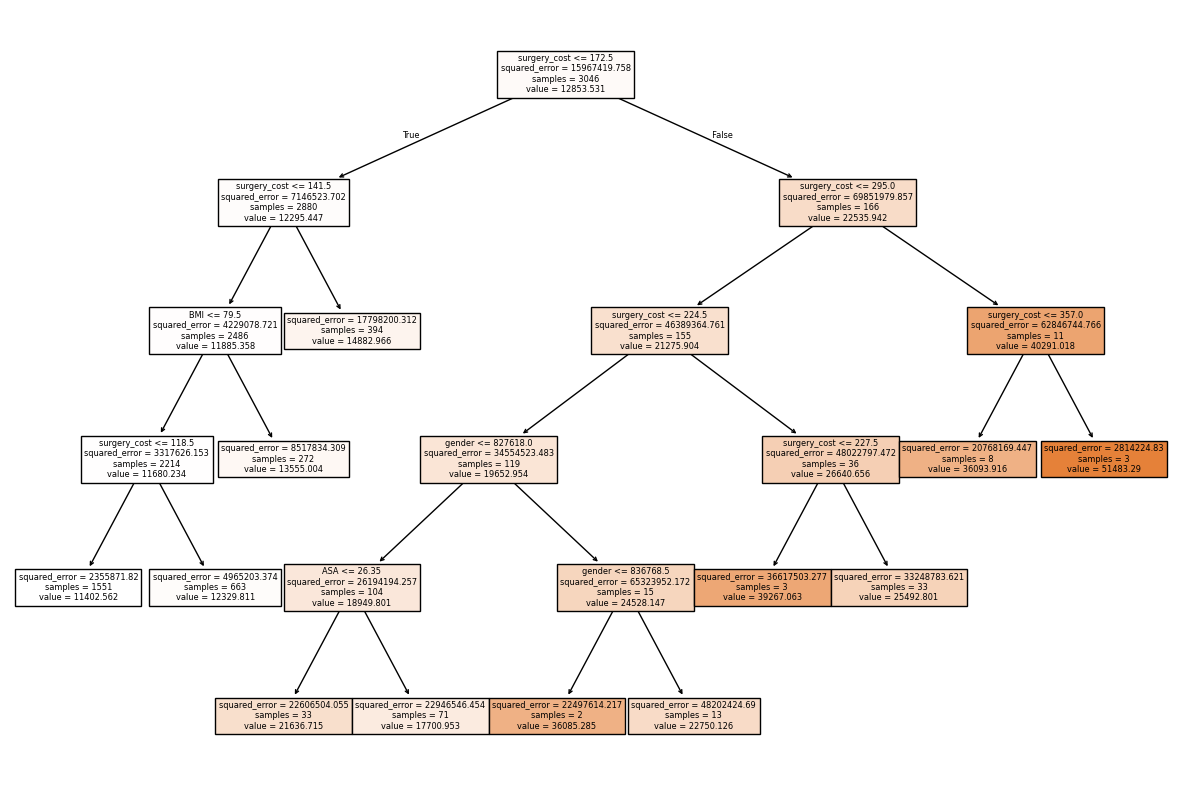

In [7]:
# (a) Splitting data into 80% training and 20% testing sets
# and building Regression Tree with RSS Splitting Critierion
# to model surgery cost. Applying cost complexity pruning.

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.20,
                                    random_state=257496)

hospital_reg_tree = DecisionTreeRegressor(random_state=820101,
                                criterion="squared_error",
                                max_leaf_nodes=12)

hospital_reg_fit = hospital_reg_tree.fit(X_train, y_train)

fig = plt.figure(figsize=(15,10))
fn = ['gender', 'age', 'BMI', 'ASA', 'surgery_duration_min',
      'surgery_cost']
tree.plot_tree(hospital_reg_fit, feature_names=fn, filled=True)

In [8]:
# (b) Using fitted RSS Regression Tree to predict surgery cost
# on the testing data. Computing proportions of predicted values
# within 10%, 15%, and 20% of observed values.

y_pred = hospital_reg_fit.predict(X_test)
ind10 = []
ind15 = []
ind20 = []

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)

# Accuracies within 10%, 15%, and 20% respectively

accuracy10 = sum(ind10)/len(ind10)
print(accuracy10)
accuracy15 = sum(ind15)/len(ind15)
print(accuracy15)
accuracy20 = sum(ind20)/len(ind20)
print(accuracy20)

0.442257217847769
0.6548556430446194
0.7860892388451444


In [10]:
# (c) Building a regression tree on the training data using
# the CHAID Splitting Criterion and cost-complexity pruning.

#Splitting response variable into deciles and making them nominal.

hospital_data['deciles'] = pd.qcut(hospital_data['surgery_cost'], 10,
                                   labels=False)
deciles_coding = {0:'0th', 1:'1st', 2:'2nd', 3:'3rd', 4:'4th',
                  5:'5th', 6:'6th', 7:'7th', 8:'8th', 9:'9th'}
hospital_data['deciles'] = hospital_data['deciles'].map(deciles_coding)

X = hospital_data.iloc[:, 0:6].values
y = hospital_data.iloc[:, 6:9].values

#Splitting data into 80% training and 20% testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=233364)
X_train = pd.DataFrame(X_train, columns=['MedID', 'gender', 'age',
                                         'BMI', 'ASA', 'surgery_duration_min'])
y_train = pd.DataFrame(y_train[:,1], columns=['deciles'])
train_data = pd.concat([X_train, y_train], axis=1)

#Fitting tree

config = {'algorithm': 'CHAID', 'max_depth':4}
tree_chaid = Chefboost.fit(train_data, config, target_label='deciles')

25-02-01 21:19:57 - CHAID tree is going to be built...
25-02-01 21:20:04 - -------------------------
25-02-01 21:20:04 - finished in 7.674126625061035 seconds
25-02-01 21:20:05 - -------------------------
25-02-01 21:20:05 - Evaluate train set
25-02-01 21:20:05 - -------------------------
25-02-01 21:20:05 - Accuracy: 20.51871306631648% on 3046 instances
25-02-01 21:20:05 - Labels: ['1st' '7th' '0th' '8th' '3rd' '9th' '6th' '5th' '4th' '2nd']
25-02-01 21:20:05 - Confusion matrix: [[131, 36, 104, 19, 73, 6, 43, 61, 100, 116], [4, 28, 1, 23, 20, 23, 25, 12, 9, 13], [95, 42, 138, 37, 81, 6, 58, 63, 89, 62], [13, 47, 22, 66, 17, 36, 37, 29, 17, 19], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [47, 121, 18, 139, 108, 219, 105, 97, 68, 94], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 35, 20, 30, 10, 11, 26, 43, 17, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
25-02-01 21:20:05 - Decision 1st
25-02-01 21:20:05 - Accuracy: 76.1655
25-02-01 21:20:05 - Precision: 19.0131%, Recall: 43.8127%, F

In [11]:
# (d) using the CHAID regression tree to predict surgery cost
# on the testing set. Computing the proportion of predicted
# values within 10%, 15%, and 20% of observed values.

X_test = pd.DataFrame(X_test, columns=['MedID', 'gender', 'age', 'BMI',
                                       'ASA', 'surgery_duration_min'])
y_pred = []
for i in range(len(y_test)):
    y_pred.append(Chefboost.predict(tree_chaid, X_test.iloc[i,:]))

#Computing prediction accuracy for testing data

y_test = pd.DataFrame(y_test[:,0], columns=['surgery_cost'])
y_pred = pd.DataFrame(y_pred, columns=['predclass'])
pred_data = pd.concat([y_test, y_pred], axis=1)

df_new = pred_data.groupby('predclass')['surgery_cost'].mean()
inner_join = pd.merge(pred_data, df_new, on='predclass', how='inner')

ind10 = []
ind15 = []
ind20 = []

for sub1, sub2 in zip(inner_join['surgery_cost_x'],
                      inner_join['surgery_cost_y']):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub1 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub1 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub1 else ind20.append(0)

#accuracy within 10%

accuracy10 = sum(ind10)/len(ind10)
print(accuracy10)

#accuracy within 15%

accuracy15 = sum(ind15)/len(ind15)
print(accuracy15)

#accuracy within 20%

accuracy20 = sum(ind20)/len(ind20)
print(accuracy20)

c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[5]<=120.52166776099803:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[2]<=76.99775726583152:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

0.4225721784776903
0.5971128608923885
0.7099737532808399
